# Dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [3]:
df = pd.read_excel('D:\College\Aditya College\Sem 7\PAD\Project\Sample - Superstore.xls')
df.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

# EDA

Text(0.5, 1.0, 'State sales record')

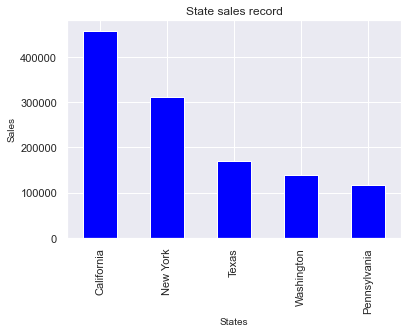

In [7]:
Sales_5 = df.groupby('State').Sales.sum().sort_values(ascending = False).head(5)
sns.set()
Sales_5.plot(kind = 'bar', color = 'blue')
plt.xlabel('States', fontsize = 10)
plt.ylabel('Sales', fontsize = 10)
plt.title('State sales record')

Text(0.5, 1.0, 'State Profit record')

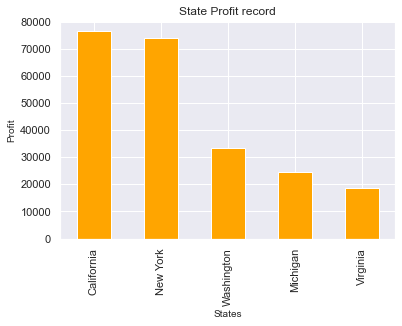

In [6]:
Profit_5 = df.groupby('State').Profit.sum().sort_values(ascending = False).head(5)
sns.set()
Profit_5.plot(kind = 'bar', color = 'orange')
plt.xlabel('States', fontsize = 10)
plt.ylabel('Profit', fontsize = 10)
plt.title('State Profit record')

<AxesSubplot:>

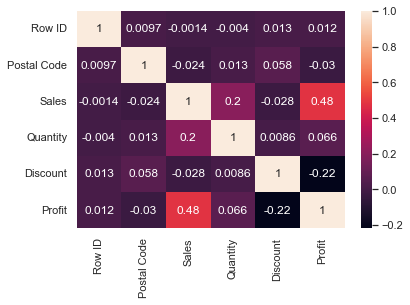

In [9]:
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

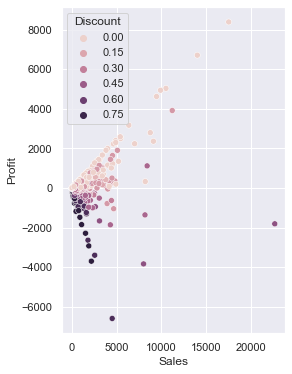

In [11]:
plt.figure(figsize = (4,6))
sns.scatterplot(x = 'Sales', y = 'Profit',data = df,hue ='Discount')

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

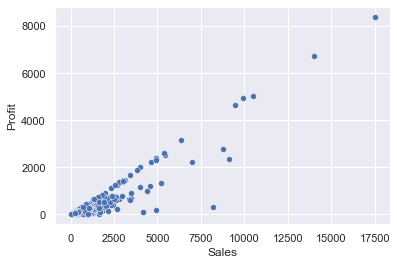

In [12]:
#when discount is 0 gives us a positive relation
abc = df[df['Discount']==0]
sns.scatterplot(x = 'Sales', y = 'Profit',data = abc)

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

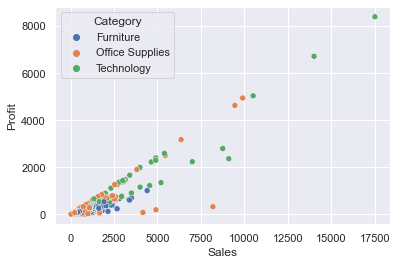

In [13]:
sns.scatterplot(x = 'Sales', y = 'Profit',data = abc,hue ='Category')

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

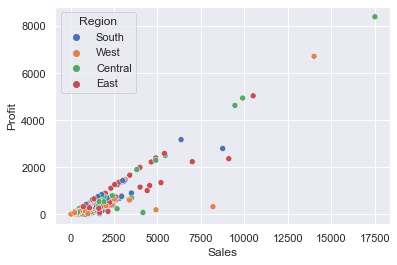

In [14]:
sns.scatterplot(x = 'Sales', y = 'Profit',data = abc,hue ='Region')

<AxesSubplot:xlabel='Ship Mode', ylabel='Sales'>

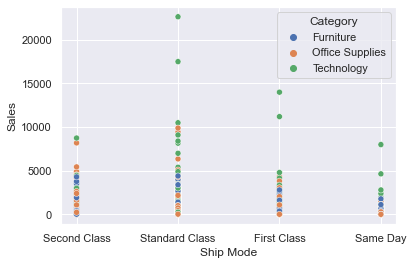

In [15]:
sns.scatterplot(x=df['Ship Mode'], y=df['Sales'], hue=df['Category'])

D:\Installations\envs\first_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sales', ylabel='Profit'>

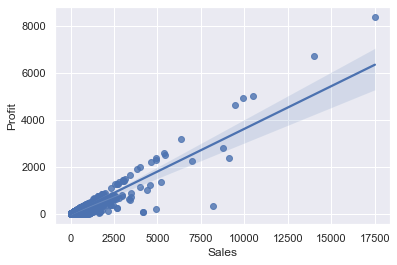

In [16]:
#Regression Plot
sns.regplot(abc['Sales'],abc['Profit'])

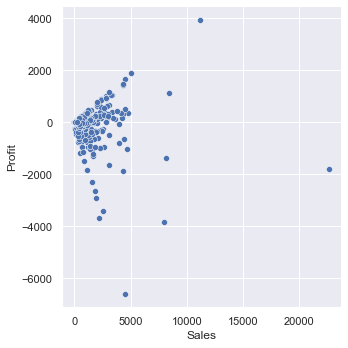

In [17]:
#when discount is not 0
abc = df[df['Discount']!=0]
sns.relplot(x = 'Sales', y = 'Profit',data = abc)
#when sales is not 0 we can see that discountt is increasing and profit is decreasing

Text(0, 0.5, 'Profit')

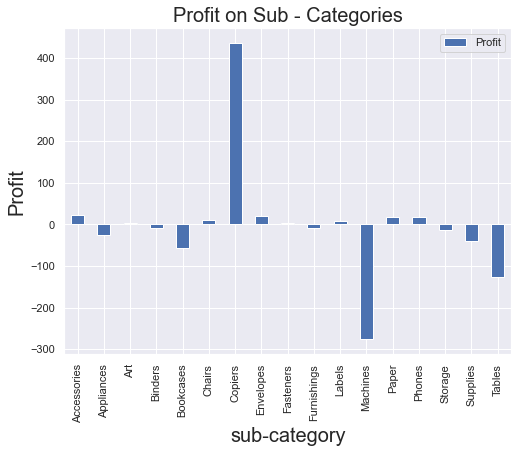

In [18]:
p = pd.pivot_table(abc,index='Sub-Category', values = 'Profit')
p.plot(kind= 'bar', figsize = (8,6))
plt.title('Profit on Sub - Categories', fontsize = 20)
plt.xlabel('sub-category',fontsize = 20)
plt.ylabel('Profit',fontsize = 20)
#copiers highest profit but machines highest loss

Text(0, 0.5, 'Sales')

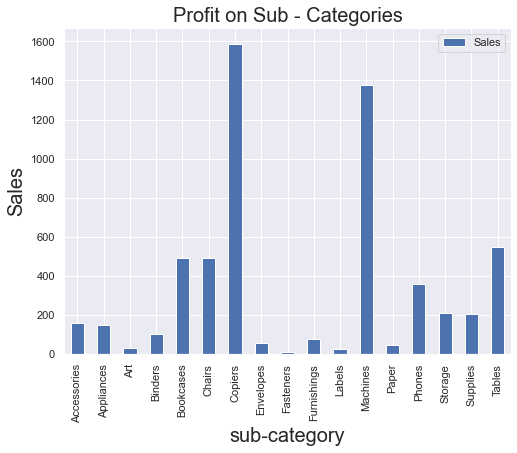

In [19]:
p = pd.pivot_table(abc,index='Sub-Category', values = 'Sales')
p.plot(kind= 'bar', figsize = (8,6))
plt.title('Profit on Sub - Categories', fontsize = 20)
plt.xlabel('sub-category',fontsize = 20)
plt.ylabel('Sales',fontsize = 20)
#machines and tables have high sales but profit was down as diwali ka discount zyaada de diya tha

<AxesSubplot:xlabel='Region', ylabel='Profit'>

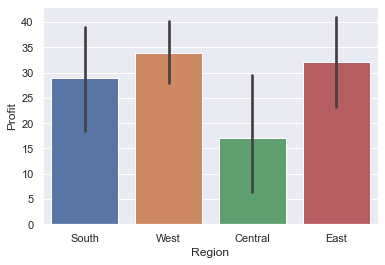

In [20]:
sns.barplot(x = 'Region', y = 'Profit', data = df,)

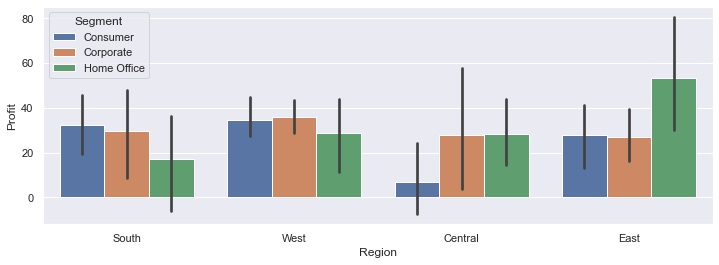

In [21]:
plt.figure(figsize = (12,4))
sns.barplot(x = 'Region', y = 'Profit', data = df, hue = 'Segment')
plt.show()
#central region is anamolously low in consumer segment

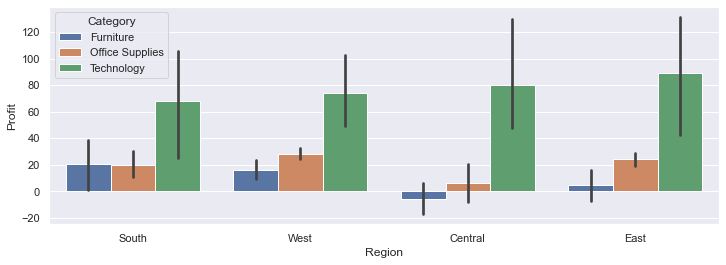

In [22]:
plt.figure(figsize = (12,4))
sns.barplot(x = 'Region', y = 'Profit', data = df, hue = 'Category')
plt.show()
#central region only in loss, furniture is the category

<AxesSubplot:xlabel='Category', ylabel='Profit'>

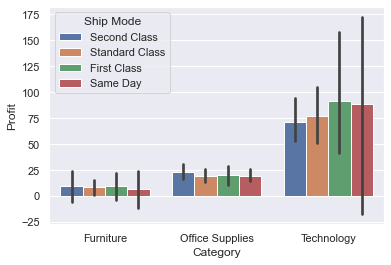

In [23]:
sns.barplot(x = 'Category', y = 'Profit', data = df, hue = 'Ship Mode')
#loss is in furniture category irrespective of ship mode 

<AxesSubplot:xlabel='Category'>

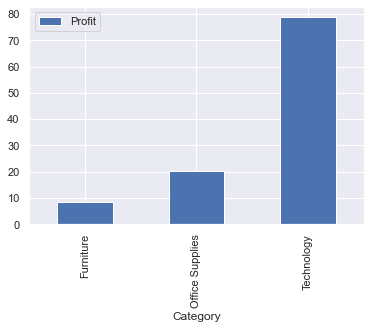

In [24]:
abc=pd.pivot_table(df,index = 'Category',values='Profit')
abc.plot(kind = 'bar')

<AxesSubplot:xlabel='Category'>

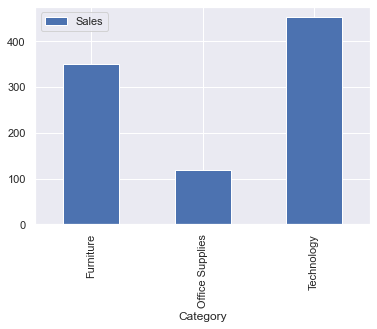

In [25]:
abc=pd.pivot_table(df,index = 'Category',values='Sales')
abc.plot(kind = 'bar')

                      Profit        Sales
Category                                 
Furniture         18451.2728  741999.7953
Office Supplies  122490.8008  719047.0320
Technology       145454.9481  836154.0330


D:\Installations\envs\first_env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Category-wise Profit and Sale')

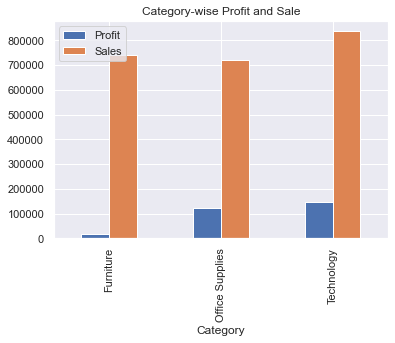

In [26]:
ds =df.groupby('Category')['Profit','Sales'].agg('sum')
print(ds)
ds.plot.bar()
plt.legend(loc='upper left')
plt.title('Category-wise Profit and Sale')

<AxesSubplot:ylabel='Region'>

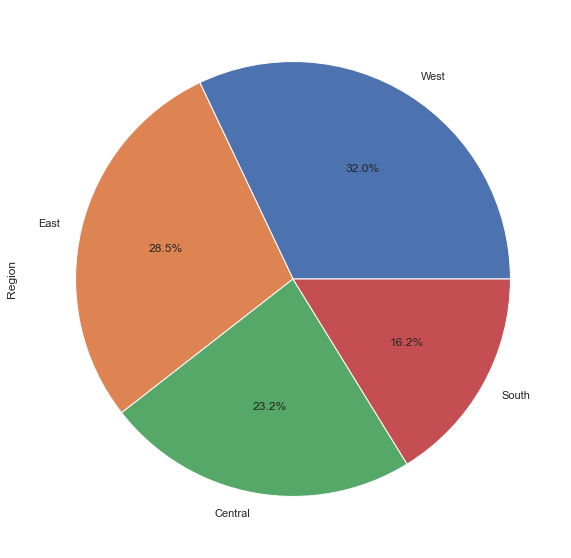

In [27]:
plt.figure(figsize=(10,10))
df['Region'].value_counts().plot.pie(autopct="%1.1f%%")

Text(0.5, 1.0, 'Quantity of different Sub-Categories Ordered')

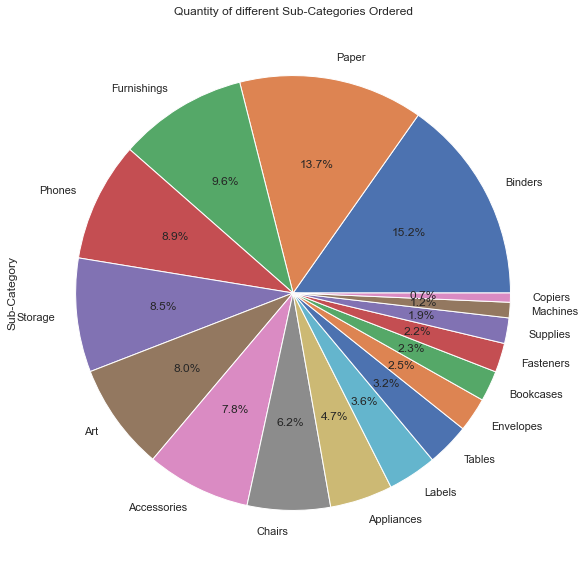

In [28]:
plt.figure(figsize=(10,10))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title('Quantity of different Sub-Categories Ordered')

# Comparision of All

In [6]:
df1 = df.filter(['Sales', 'Quantity','Discount','Profit'])
df1.head()

Sales  Quantity  Discount    Profit
0  261.9600         2      0.00   41.9136
1  731.9400         3      0.00  219.5820
2   14.6200         2      0.00    6.8714
3  957.5775         5      0.45 -383.0310
4   22.3680         2      0.20    2.5164

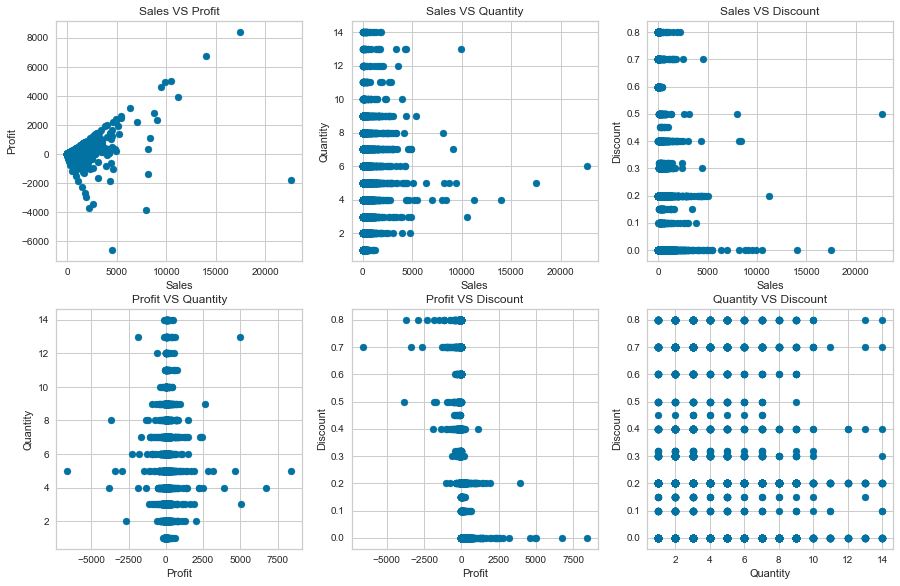

In [125]:
X1 = df1['Sales']
X2 = df1['Profit']
X3 = df1['Quantity']
X4 = df1['Discount']

plt.figure(figsize=(15,15))

plt.subplot(3,3,1)
plt.title("Sales VS Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.scatter(X1,X2)

plt.subplot(3,3,2)
plt.title("Sales VS Quantity")
plt.xlabel("Sales")
plt.ylabel("Quantity")
plt.scatter(X1,X3)


plt.subplot(3,3,3)
plt.title("Sales VS Discount")
plt.xlabel("Sales")
plt.ylabel("Discount")
plt.scatter(X1,X4)

plt.subplot(3,3,4)
plt.title("Profit VS Quantity")
plt.xlabel("Profit")
plt.ylabel("Quantity")
plt.scatter(X2,X3)

plt.subplot(3,3,5)
plt.title("Profit VS Discount")
plt.xlabel("Profit")
plt.ylabel("Discount")
plt.scatter(X2,X4)

plt.subplot(3,3,6)
plt.title("Quantity VS Discount")
plt.xlabel("Quantity")
plt.ylabel("Discount")
plt.scatter(X3,X4)




<h2 >Sales</h2>

count    9994.000000
mean        0.010134
std         0.027531
min         0.000000
25%         0.000744
50%         0.002387
75%         0.009254
max         1.000000
Name: Sales, dtype: float64
None
Skewness: 12.972752
Kurtosis: 305.311753


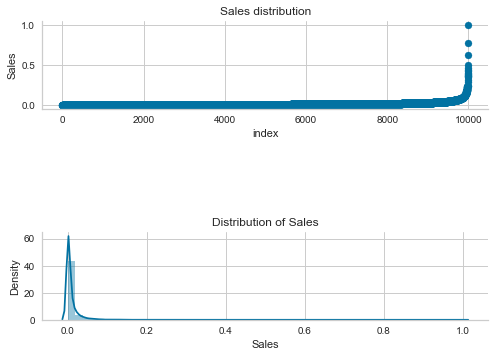

In [187]:
print(df.Sales.describe())

plt.subplot(3,1,1)
plt.scatter(range(df.shape[0]), np.sort(df['Sales'].values))
plt.xlabel('index')
plt.ylabel('Sales')
plt.title("Sales distribution")
print(sns.despine())

plt.subplot(3,1,3)
sns.distplot(df['Sales'])
sns.despine()
plt.title("Distribution of Sales")


print("Skewness: %f" % df['Sales'].skew())
print("Kurtosis: %f" % df['Sales'].kurt())

Anomaly detection on Sales

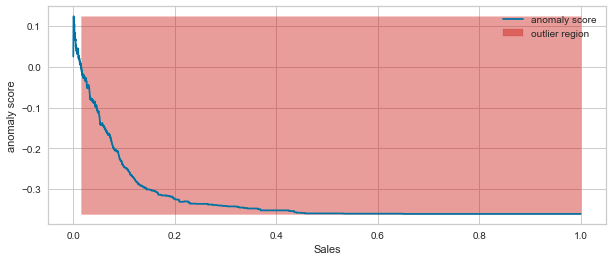

In [188]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['Sales'].values.reshape(-1, 1))
xx = np.linspace(df['Sales'].min(), df['Sales'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Sales')
plt.show();

<h2 >Profit</h2>

count    9994.000000
mean        0.441910
std         0.015617
min         0.000000
25%         0.440115
50%         0.440578
75%         0.441957
max         1.000000
Name: Profit, dtype: float64
Skewness: 7.561432
Kurtosis: 397.188515


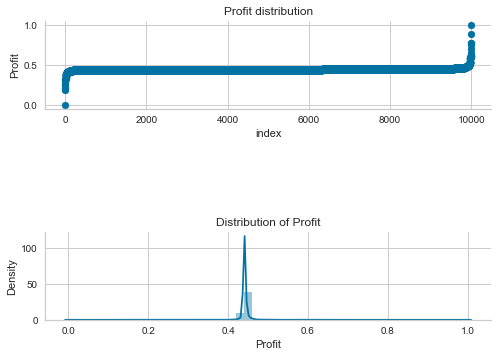

In [189]:
print(df.Profit.describe())
print("Skewness: %f" % df['Profit'].skew())
print("Kurtosis: %f" % df['Profit'].kurt())

plt.subplot(3,1,1)
plt.scatter(range(df.shape[0]), np.sort(df['Profit'].values))
plt.xlabel('index')
plt.ylabel('Profit')
plt.title("Profit distribution")
sns.despine()

plt.subplot(3,1,3)
sns.distplot(df['Profit'])
plt.title("Distribution of Profit")
sns.despine()

Anomaly detection on Profit

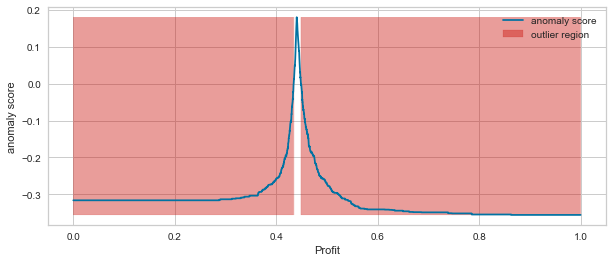

In [190]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['Profit'].values.reshape(-1, 1))
xx = np.linspace(df['Profit'].min(), df['Profit'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Profit')
plt.show();

# DBSCAN

In [126]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from numpy import random,where
import matplotlib.pyplot as plt

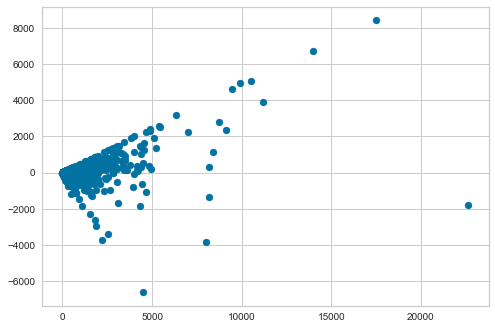

In [127]:
plt.scatter(df1['Sales'],df1['Profit'])

In [128]:
X = np.column_stack((df1['Sales'],df1['Profit']))
print(X)

[[261.96    41.9136]
 [731.94   219.582 ]
 [ 14.62     6.8714]
 ...
 [258.576   19.3932]
 [ 29.6     13.32  ]
 [243.16    72.948 ]]


In [129]:
dbscan = DBSCAN(eps=1000, min_samples=10)


In [130]:
pred = dbscan.fit_predict(X)

[0 0 0 ... 0 0 0]


In [131]:
anom_index = where(pred==-1)
values=X[anom_index]

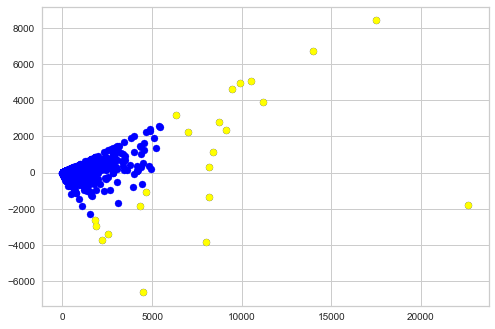

In [132]:
plt.scatter(X[:,0],X[:,1],c = 'blue')
plt.scatter(values[:,0],values[:,1],color='yellow')

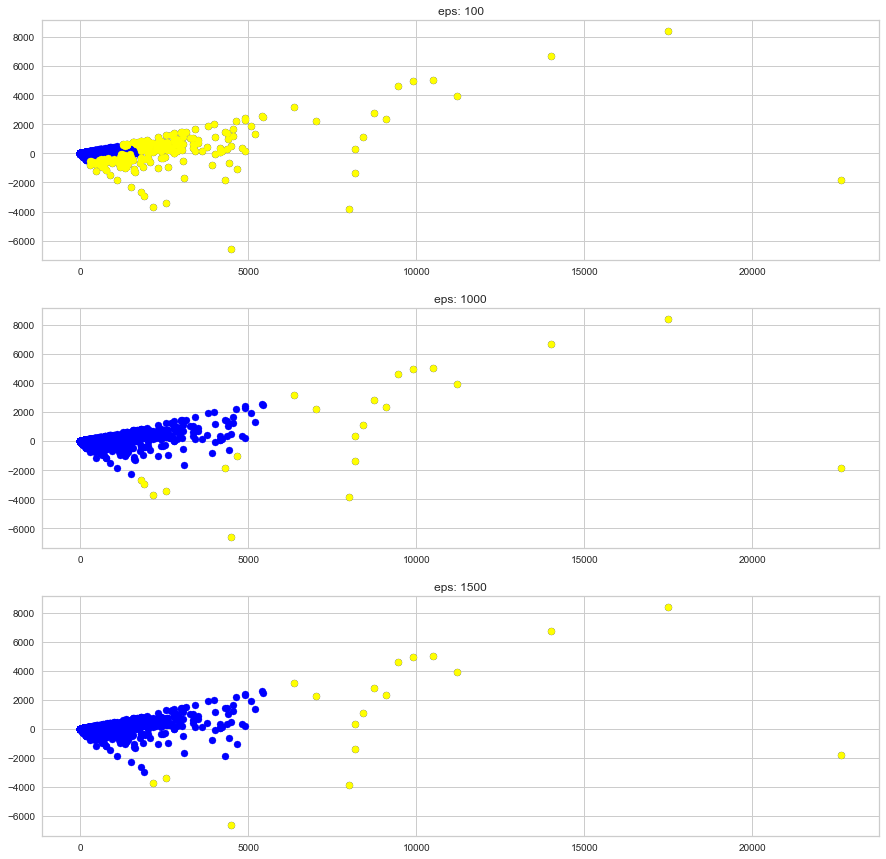

In [144]:
eps = [100,1000,1500]
plt.figure(figsize=(15,15))
f = 1

for i in range(3):
    dbscan = DBSCAN(eps=eps[i], min_samples=10)
    pred = dbscan.fit_predict(X)
    anom_index = where(pred==-1)
    values=X[anom_index]
    eps_value = eps[i]

    plt.subplot(3,1,i+1)
    plt.title("eps: "+str(eps_value))
    plt.scatter(X[:,0],X[:,1],c = 'blue')
    plt.scatter(values[:,0],values[:,1],color='yellow')

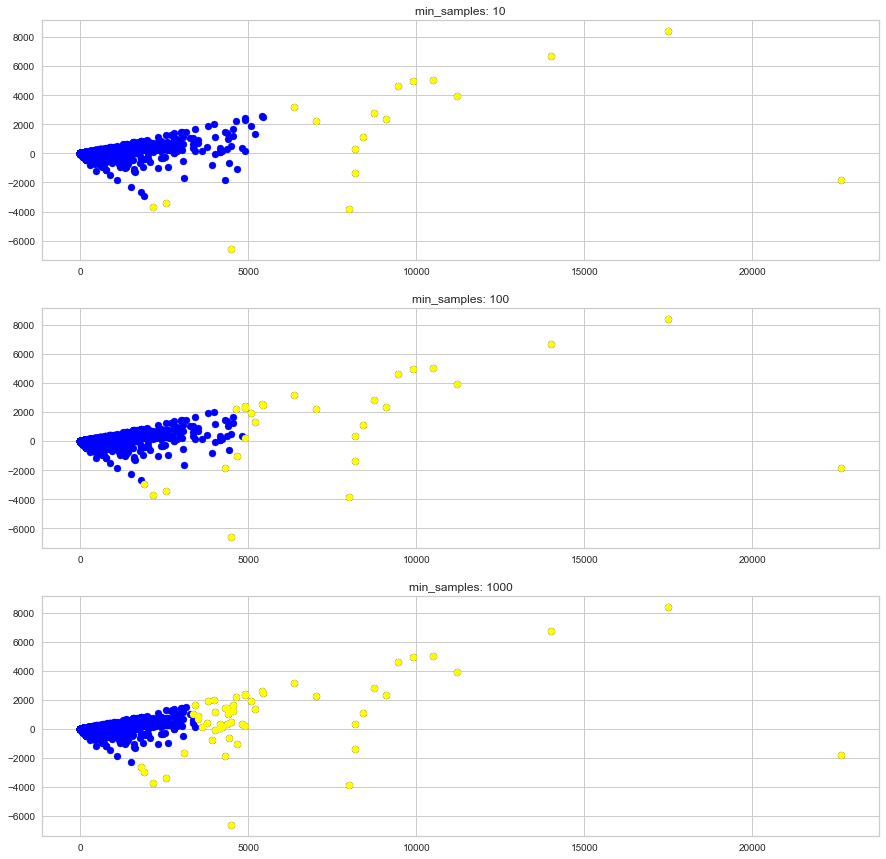

In [146]:
min_samples = [10,100,1000]
plt.figure(figsize=(15,15))
f = 1

for i in range(3):
    dbscan = DBSCAN(eps=1500, min_samples=min_samples[i])
    pred = dbscan.fit_predict(X)
    anom_index = where(pred==-1)
    values=X[anom_index]
    min_value = min_samples[i]

    plt.subplot(3,1,i+1)
    plt.title("min_samples: "+str(min_value))
    plt.scatter(X[:,0],X[:,1],c = 'blue')
    plt.scatter(values[:,0],values[:,1],color='yellow')

# KNN

In [92]:
from sklearn.neighbors import NearestNeighbors

In [95]:
nbrs = NearestNeighbors(n_neighbors=3)
nbrs.fit(X)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                 radius=1.0)

In [97]:
distances, indexes = nbrs.kneighbors(X)

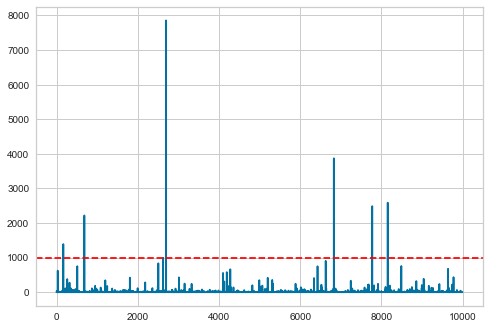

In [195]:
plt.plot(distances.mean(axis=1))
plt.axhline(y=1000, color='red', linestyle='--')

In [103]:
abn_index = np.where(distances.mean(axis=1)>1000)

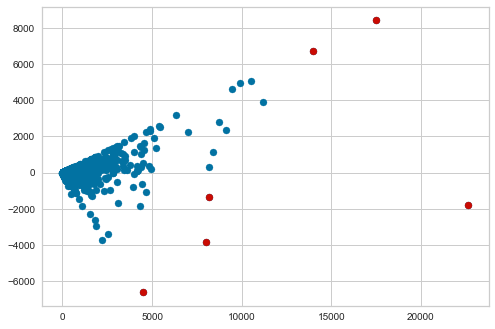

In [104]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(X[abn_index,0],X[abn_index,1],color = 'r')

# LOF

In [116]:
from sklearn.neighbors import LocalOutlierFactor
from numpy import quantile, where, random

In [110]:
model_lof = LocalOutlierFactor(n_neighbors= 100 , contamination= 0.1)

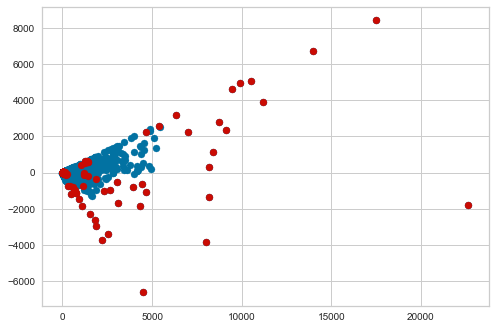

LocalOutlierFactor(algorithm='auto', contamination='auto', leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=20, novelty=False, p=2)
-1.458944230679981


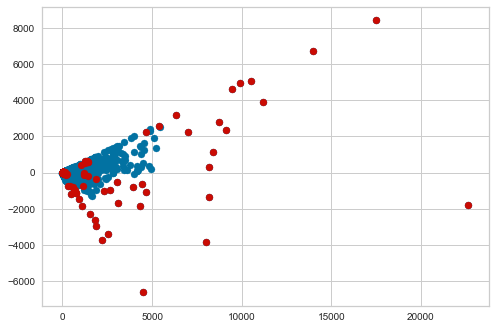

In [118]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=.03)

y_pred = lof.fit_predict(X)

lofs_index=where(y_pred==-1)
values = X[lofs_index]

plt.scatter(X[:,0], X[:,1])
plt.scatter(values[:,0],values[:,1], color='r')
plt.show()

model = LocalOutlierFactor(n_neighbors=20) 
print(model)  
model.fit_predict(X) 
 
lof = model.negative_outlier_factor_
thresh = quantile(lof, .03)
print(thresh) 
 
index = where(lof<=thresh)
values = X[index]

plt.scatter(X[:,0], X[:,1])
plt.scatter(values[:,0],values[:,1], color='r')
plt.show()

# Hierarchical Clustering

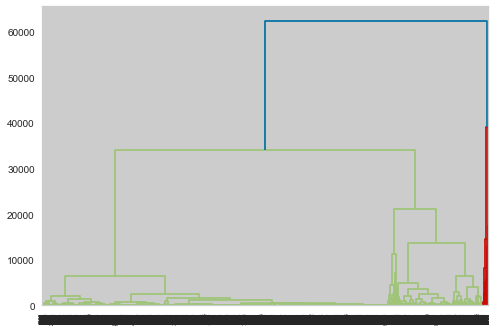

In [147]:

from sklearn.cluster import AgglomerativeClustering

clusters = 3
y_pred = AgglomerativeClustering(n_clusters=clusters).fit_predict(X)


from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

clusters=5
cls = linkage(X, method='ward')
y_pred = fcluster(cls, t=clusters, criterion='maxclust')

dendrogram(cls)
plt.show()

# PYOD

In [184]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from scipy import stats
from sklearn.preprocessing import MinMaxScaler


In [185]:
minmax = MinMaxScaler(feature_range=(0, 1))
df[['Sales','Profit']] = minmax.fit_transform(df[['Sales','Profit']])
df[['Sales','Profit']].head()
X1 = df['Sales'].values.reshape(-1,1)
X2 = df['Profit'].values.reshape(-1,1)

X = np.concatenate((X1,X2),axis=1)

Cluster-based Local Outlier Factor

OUTLIERS: 100 INLIERS: 9894


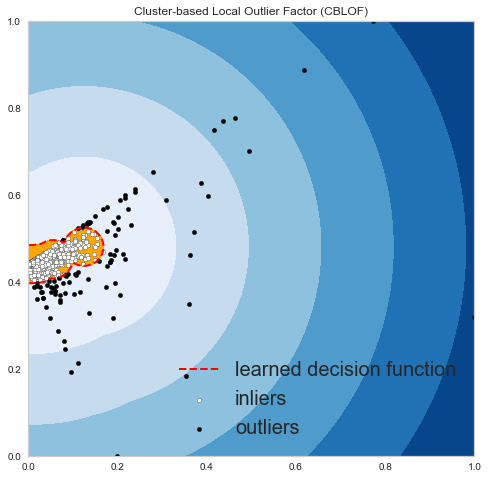

In [180]:
outliers_fraction = 0.01
xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
clf = CBLOF(contamination=outliers_fraction,check_estimator=False, random_state=0)
clf.fit(X)
# predict raw anomaly score
scores_pred = clf.decision_function(X) * -1
        
# prediction of a datapoint category outlier or inlier
y_pred = clf.predict(X)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)

plt.figure(figsize=(8, 8))

df1 = df
df1['outlier'] = y_pred.tolist()
    
# sales - inlier feature 1,  profit - inlier feature 2
inliers_sales = np.array(df1['Sales'][df1['outlier'] == 0]).reshape(-1,1)
inliers_profit = np.array(df1['Profit'][df1['outlier'] == 0]).reshape(-1,1)
    
# sales - outlier feature 1, profit - outlier feature 2
outliers_sales = df1['Sales'][df1['outlier'] == 1].values.reshape(-1,1)
outliers_profit = df1['Profit'][df1['outlier'] == 1].values.reshape(-1,1)
         
print('OUTLIERS:',n_outliers,'INLIERS:',n_inliers)
        
# Use threshold value to consider a datapoint inlier or outlier
# threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)
threshold = percentile(scores_pred, 100 * outliers_fraction)
        
# decision function calculates the raw anomaly score for every point
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)
# fill blue map colormap from minimum anomaly score to threshold value
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        
# draw red contour line where anomaly score is equal to thresold
a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
# fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
b = plt.scatter(inliers_sales, inliers_profit, c='white',s=20, edgecolor='k')
    
c = plt.scatter(outliers_sales, outliers_profit, c='black',s=20, edgecolor='k')
       
plt.axis('tight')   
plt.legend([a.collections[0], b,c], ['learned decision function', 'inliers','outliers'],
           prop=matplotlib.font_manager.FontProperties(size=20),loc='lower right')
      
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.title('Cluster-based Local Outlier Factor (CBLOF)')
plt.show()

Histogram Based Outliers

OUTLIERS: 90 INLIERS: 9904


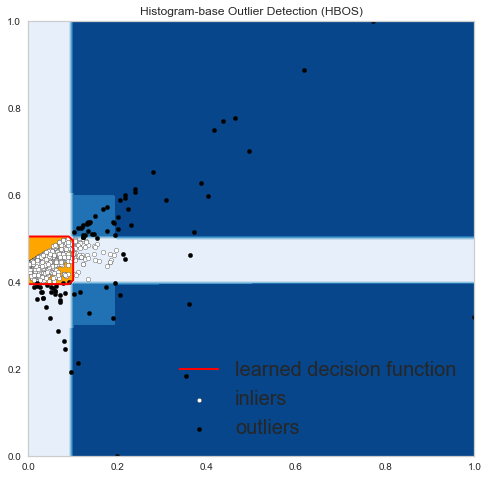

In [181]:
outliers_fraction = 0.01
xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
clf = HBOS(contamination=outliers_fraction)
clf.fit(X)
# predict raw anomaly score
scores_pred = clf.decision_function(X) * -1
        
# prediction of a datapoint category outlier or inlier
y_pred = clf.predict(X)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
plt.figure(figsize=(8, 8))
# copy of dataframe
df1 = df
df1['outlier'] = y_pred.tolist()
    
# sales - inlier feature 1,  profit - inlier feature 2
inliers_sales = np.array(df1['Sales'][df1['outlier'] == 0]).reshape(-1,1)
inliers_profit = np.array(df1['Profit'][df1['outlier'] == 0]).reshape(-1,1)
    
# sales - outlier feature 1, profit - outlier feature 2
outliers_sales = df1['Sales'][df1['outlier'] == 1].values.reshape(-1,1)
outliers_profit = df1['Profit'][df1['outlier'] == 1].values.reshape(-1,1)
         
print('OUTLIERS:',n_outliers,'INLIERS:',n_inliers)
        
# threshold value to consider a datapoint inlier or outlier
threshold = percentile(scores_pred, 100 * outliers_fraction)
        
# decision function calculates the raw anomaly score for every point
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)
# fill blue map colormap from minimum anomaly score to threshold value
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        
# draw red contour line where anomaly score is equal to thresold
a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
# fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
b = plt.scatter(inliers_sales, inliers_profit, c='white',s=20, edgecolor='k')
    
c = plt.scatter(outliers_sales, outliers_profit, c='black',s=20, edgecolor='k')
       
plt.axis('tight')  
     
plt.legend([a.collections[0], b,c], ['learned decision function', 'inliers','outliers'],
           prop=matplotlib.font_manager.FontProperties(size=20),loc='lower right')
      
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.title('Histogram-base Outlier Detection (HBOS)')
plt.show();

Isolation Forest

OUTLIERS:  100 INLIERS:  9894


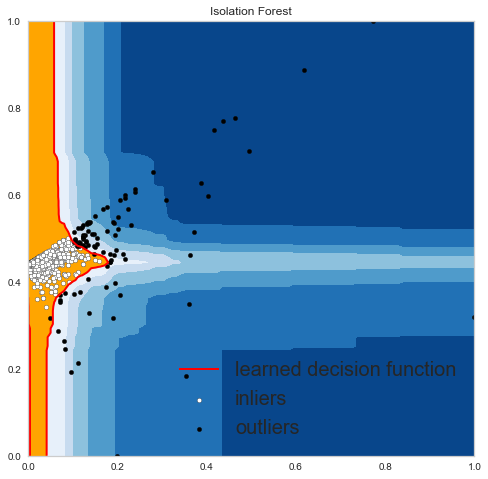

In [182]:
outliers_fraction = 0.01
xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
clf = IForest(contamination=outliers_fraction,random_state=0)
clf.fit(X)
# predict raw anomaly score
scores_pred = clf.decision_function(X) * -1
        
# prediction of a datapoint category outlier or inlier
y_pred = clf.predict(X)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
plt.figure(figsize=(8, 8))
# copy of dataframe
df1 = df
df1['outlier'] = y_pred.tolist()
    
# sales - inlier feature 1,  profit - inlier feature 2
inliers_sales = np.array(df1['Sales'][df1['outlier'] == 0]).reshape(-1,1)
inliers_profit = np.array(df1['Profit'][df1['outlier'] == 0]).reshape(-1,1)
    
# sales - outlier feature 1, profit - outlier feature 2
outliers_sales = df1['Sales'][df1['outlier'] == 1].values.reshape(-1,1)
outliers_profit = df1['Profit'][df1['outlier'] == 1].values.reshape(-1,1)
         
print('OUTLIERS: ',n_outliers,'INLIERS: ',n_inliers)
        
# threshold value to consider a datapoint inlier or outlier
threshold = percentile(scores_pred, 100 * outliers_fraction)
        
# decision function calculates the raw anomaly score for every point
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)
# fill blue map colormap from minimum anomaly score to threshold value
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        
# draw red contour line where anomaly score is equal to thresold
a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
# fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
b = plt.scatter(inliers_sales, inliers_profit, c='white',s=20, edgecolor='k')
    
c = plt.scatter(outliers_sales, outliers_profit, c='black',s=20, edgecolor='k')
       
plt.axis('tight')
plt.legend([a.collections[0], b,c], ['learned decision function', 'inliers','outliers'],
           prop=matplotlib.font_manager.FontProperties(size=20),loc='lower right')
      
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.title('Isolation Forest')
plt.show();

KNN

OUTLIERS:  91 INLIERS:  9903


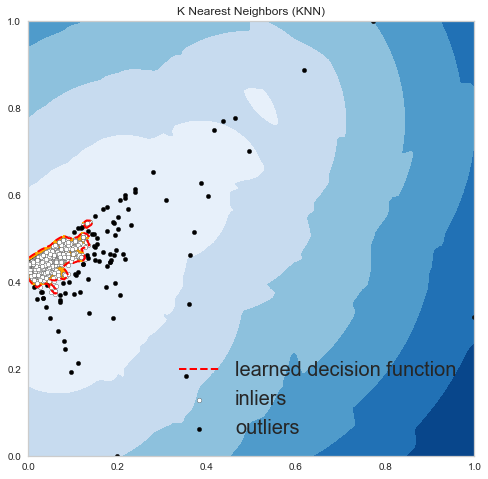

In [183]:
outliers_fraction = 0.01
xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
clf = KNN(contamination=outliers_fraction)
clf.fit(X)
# predict raw anomaly score
scores_pred = clf.decision_function(X) * -1
        
# prediction of a datapoint category outlier or inlier
y_pred = clf.predict(X)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
plt.figure(figsize=(8, 8))
# copy of dataframe
df1 = df
df1['outlier'] = y_pred.tolist()
    
# sales - inlier feature 1,  profit - inlier feature 2
inliers_sales = np.array(df1['Sales'][df1['outlier'] == 0]).reshape(-1,1)
inliers_profit = np.array(df1['Profit'][df1['outlier'] == 0]).reshape(-1,1)
    
# sales - outlier feature 1, profit - outlier feature 2
outliers_sales = df1['Sales'][df1['outlier'] == 1].values.reshape(-1,1)
outliers_profit = df1['Profit'][df1['outlier'] == 1].values.reshape(-1,1)
         
print('OUTLIERS: ',n_outliers,'INLIERS: ',n_inliers)
        
# threshold value to consider a datapoint inlier or outlier
threshold = percentile(scores_pred, 100 * outliers_fraction)
        
# decision function calculates the raw anomaly score for every point
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)
# fill blue map colormap from minimum anomaly score to threshold value
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        
# draw red contour line where anomaly score is equal to thresold
a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
# fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
b = plt.scatter(inliers_sales, inliers_profit, c='white',s=20, edgecolor='k')
    
c = plt.scatter(outliers_sales, outliers_profit, c='black',s=20, edgecolor='k')
       
plt.axis('tight')  
   
plt.legend([a.collections[0], b,c], ['learned decision function', 'inliers','outliers'],
           prop=matplotlib.font_manager.FontProperties(size=20),loc='lower right')
      
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.title('K Nearest Neighbors (KNN)')
plt.show();

In [213]:
df2 = df1.filter(['outlier'])
print(df2.sum())

outlier    91
dtype: int64


In [197]:
df1.iloc[1995]

Row ID                                                        1996
Order ID                                            US-2017-147221
Order Date                                     2017-12-02 00:00:00
Ship Date                                      2017-12-04 00:00:00
Ship Mode                                             Second Class
Customer ID                                               JS-16030
Customer Name                                            Joy Smith
Segment                                                   Consumer
Country                                              United States
City                                                       Houston
State                                                        Texas
Postal Code                                                  77036
Region                                                     Central
Product ID                                         OFF-AP-10002534
Category                                           Office Supp

# PYCARET

In [8]:
#from pycaret.datasets import get_data
data=df1
from pycaret.anomaly import *
setup=setup(df1)

In [9]:
iforest=create_model('iforest')
plot_model(iforest)

In [10]:
knn=create_model('knn')
plot_model(knn)

In [11]:
knn_prediction=predict_model(knn, data=df1)
knn_prediction

Sales  Quantity  Discount    Profit  Anomaly  Anomaly_Score
0     261.9600         2      0.00   41.9136        0       8.277587
1     731.9400         3      0.00  219.5820        0      21.628668
2      14.6200         2      0.00    6.8714        0       0.000000
3     957.5775         5      0.45 -383.0310        1      84.715031
4      22.3680         2      0.20    2.5164        0       1.262165
...        ...       ...       ...       ...      ...            ...
9989   25.2480         3      0.20    4.1028        0       1.478336
9990   91.9600         2      0.00   15.6332        0       2.023882
9991  258.5760         2      0.20   19.3932        0       5.581267
9992   29.6000         4      0.00   13.3200        0       1.063307
9993  243.1600         2      0.00   72.9480        0       3.403548

[9994 rows x 6 columns]